In [1]:
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd 'drive/MyDrive/GitHub/master-thesis'

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

In [ ]:
#%cd ..

/home/anuar/PycharmProjects/master-thesis


# Import Data

In [5]:
df, answers, info_dict = get_cluster_input_data(grouped_data=True)
df.head()

,gender,postnr,region,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,...,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers,group_q2_following_advice,group_q2_consequence_advice,group_q3_cleaning,group_q3_distancing,group_q5_beh_other,group_q6_opinion
0,0,2830,Capital,NaN,4.797035,5.0,7.0,4.0,7.0,4.0,...,0,0,0,0,5.75,4.5,5.5,6.8,5.000000,5.8
1,1,4654,Zealand,3.0,7.000000,7.0,7.0,5.0,7.0,6.0,...,0,0,2,2,6.50,5.5,7.0,7.0,2.500000,6.5
2,1,7451,Central,3.0,7.000000,7.0,7.0,7.0,7.0,4.0,...,5,0,0,0,7.00,3.5,6.0,6.5,5.500000,5.8
3,1,6740,Southern,2.0,2.000000,3.0,3.0,7.0,7.0,1.0,...,0,0,0,0,5.00,1.0,7.0,7.0,4.521673,7.0
4,0,4700,Zealand,6.0,6.000000,1.0,7.0,2.0,1.0,7.0,...,4,1,4,15,2.75,5.5,7.0,6.0,3.500000,4.6


In [6]:
info_dict

{'cluster_input_cols': ['group_q2_following_advice',
  'group_q2_consequence_advice',
  'group_q3_cleaning',
  'group_q3_distancing',
  'group_q5_beh_other',
  'group_q6_opinion'],
 'combined_data': False,
 'data_path': 'data/preprocessing/dim_reduction/220407_grouped_data.csv',
 'grouped_data': True,
 'pca_data': False,
 'scaler_type': 'MinMaxScaler()'}

# K-means clustering

## Elbow approach to determine ideal amount of clusters

In [7]:
distortions = []
distortions_k = []
K = range(1,9)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(answers)
    distortions.append(kmeanModel.inertia_)
    distortions_k.append(kmeanModel.inertia_/k)


100%|██████████| 8/8 [00:35<00:00,  4.44s/it]


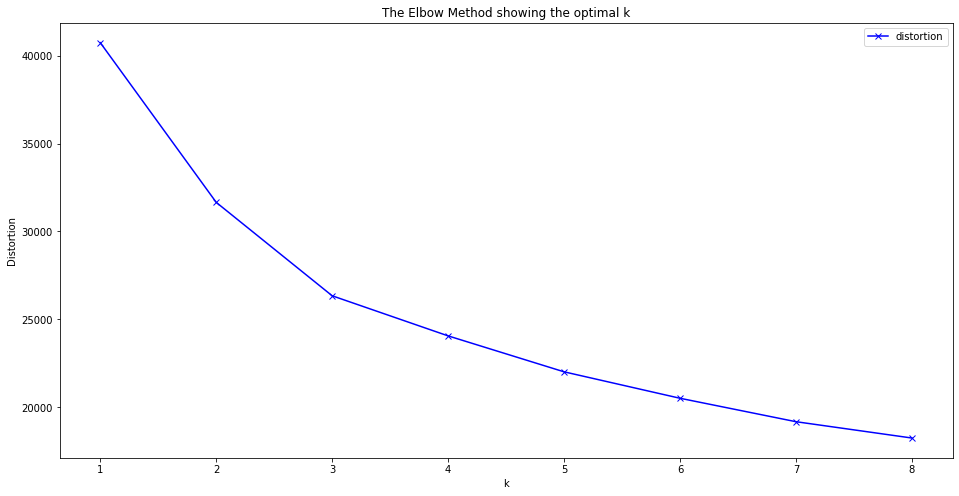

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', label='distortion')
#plt.plot(K, distortions_k, 'rx-', label='distortion/K')
plt.legend()
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means fit

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(answers)

In [10]:
df['group']=kmeans.labels_

In [11]:
df.head()

,gender,postnr,region,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,...,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers,group_q2_following_advice,group_q2_consequence_advice,group_q3_cleaning,group_q3_distancing,group_q5_beh_other,group_q6_opinion,group
0,0,2830,Capital,NaN,4.797035,5.0,7.0,4.0,7.0,4.0,...,0,0,0,5.75,4.5,5.5,6.8,5.000000,5.8,2
1,1,4654,Zealand,3.0,7.000000,7.0,7.0,5.0,7.0,6.0,...,0,2,2,6.50,5.5,7.0,7.0,2.500000,6.5,2
2,1,7451,Central,3.0,7.000000,7.0,7.0,7.0,7.0,4.0,...,0,0,0,7.00,3.5,6.0,6.5,5.500000,5.8,1
3,1,6740,Southern,2.0,2.000000,3.0,3.0,7.0,7.0,1.0,...,0,0,0,5.00,1.0,7.0,7.0,4.521673,7.0,1
4,0,4700,Zealand,6.0,6.000000,1.0,7.0,2.0,1.0,7.0,...,1,4,15,2.75,5.5,7.0,6.0,3.500000,4.6,0


# Saving Data

In [12]:
df.to_csv("data/clustering/220415_k_means_grouped_data.csv",index=False)